In [1]:
# !pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.3 MB/s eta 0:00:0000:0100:01


In [2]:
# import torch
# from tqdm import tqdm
# from torch.utils.data import Dataset, DataLoader
# from Bio import SeqIO
# import imageio.v2 as imageio
# import glob
# import os
# from IPython.display import Image, display


# print("imports done")

imports done


In [3]:
# input_file = "/kaggle/input/protein/sequence .fasta"
# print(input_file)


/kaggle/input/protein/sequence .fasta


In [4]:
    # with open(input_file, "r") as file:
    #     # Read the entire content
    #     content = file.read()
    #     # Print the content
    #     print(content)

>pdb|7CYP|C Chain C, SARS-CoV-2 Spike glycoprotein
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHV
SGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPF
LGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPI
NLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYN
ENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASV
YAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIAD
YNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYF
PLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFL
PFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLT
PTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPGSASSVASQSIIAYTMSLG
AENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGI
AVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIMQYGDC
LGDMAYRDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIG
VTQNVLYENQKLIANQFNSAIGKIQD

In [5]:
# # --- Step 0: Amino acid mapping ---
# aa_to_name = {
#     "A": "Alanine",      "C": "Cysteine",   "D": "Aspartic Acid",
#     "E": "Glutamic Acid","F": "Phenylalanine", "G": "Glycine",
#     "H": "Histidine",    "I": "Isoleucine", "K": "Lysine",
#     "L": "Leucine",      "M": "Methionine", "N": "Asparagine",
#     "P": "Proline",      "Q": "Glutamine",  "R": "Arginine",
#     "S": "Serine",       "T": "Threonine",  "V": "Valine",
#     "W": "Tryptophan",   "Y": "Tyrosine"
# }

# # --- Step 1: Tokenize sequences to integers (for model input) ---
# amino_acids = "ACDEFGHIKLMNPQRSTVWY"
# aa_to_idx = {aa: i+1 for i, aa in enumerate(amino_acids)}  # 0 for unknown/padding

# sequences = []
# headers = []

# for record in SeqIO.parse(input_file, "fasta"):
#     headers.append(record.id)
#     sequences.append(str(record.seq))

# # --- Step 3: Tokenize sequences ---
# def tokenize(seq):
#     return [aa_to_idx.get(aa, 0) for aa in seq]  # unknowns -> 0

# tokenized_sequences = [tokenize(seq) for seq in sequences]

# # --- Step 4: Create custom PyTorch dataset ---
# class ProteinDataset(Dataset):
#     def __init__(self, tokenized_seqs, headers):
#         self.tokenized_seqs = tokenized_seqs
#         self.headers = headers

#     def __len__(self):
#         return len(self.tokenized_seqs)

#     def __getitem__(self, idx):
#         return {
#             "header": self.headers[idx],
#             "tokens": torch.tensor(self.tokenized_seqs[idx], dtype=torch.long)
#         }

# dataset = ProteinDataset(tokenized_sequences, headers)

# # --- Step 5: Example output ---
# sample = dataset[0]
# print("Header:", sample['header'])
# print("Tokenized sequence:", sample['tokens'])
# print("Amino acid mapping (single-letter to integer):", aa_to_idx)


Header: pdb|7CYP|C
Tokenized sequence: tensor([11,  5, 18,  ..., 20,  4, 14])
Amino acid mapping (single-letter to integer): {'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}


In [6]:
# # --- Step 1: Number of sequences ---
# num_sequences = len(dataset)
# print(f"Number of sequences in the FASTA file: {num_sequences}")

# # --- Step 2: Show all tokenized sequences ---
# for i in range(num_sequences):
#     sample = dataset[i]
#     print(f"\nHeader: {sample['header']}")
#     print(f"Tokenized sequence: {sample['tokens']}")


Number of sequences in the FASTA file: 7

Header: pdb|7CYP|C
Tokenized sequence: tensor([11,  5, 18,  ..., 20,  4, 14])

Header: pdb|7CYP|B
Tokenized sequence: tensor([11,  5, 18,  ..., 20,  4, 14])

Header: pdb|7CYP|A
Tokenized sequence: tensor([11,  5, 18,  ..., 20,  4, 14])

Header: QOS45029.1
Tokenized sequence: tensor([11,  5, 18,  ...,  7, 20, 17])

Header: QOS44769.1
Tokenized sequence: tensor([11,  5, 18,  ...,  7, 20, 17])

Header: QIG55857.1
Tokenized sequence: tensor([11,  5, 18,  ...,  7, 20, 17])

Header: QTA38985.1
Tokenized sequence: tensor([11,  5, 18,  ...,  2,  6, 16])


In [7]:
# # --- Choose a sequence index to display ---
# idx = 0  # first sequence
# sample = dataset[idx]

# # --- Original amino acid sequence ---
# original_seq = sequences[idx]

# # --- Tokenized sequence ---
# tokenized_seq = sample['tokens']

# # --- Display ---
# print("Header:", sample['header'])
# print("Original sequence (amino acids):")
# print(original_seq)
# print("\nTokenized sequence (integers):")
# print(tokenized_seq)


In [8]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from Bio import SeqIO
# from torch.nn.utils.rnn import pad_sequence

# # --- Step 0: Amino acid mapping ---
# amino_acids = "ACDEFGHIKLMNPQRSTVWY"
# aa_to_idx = {aa: i+1 for i, aa in enumerate(amino_acids)}  # 0 reserved for padding

# sequences = []
# headers = []

# for record in SeqIO.parse(input_file, "fasta"):
#     headers.append(record.id)
#     sequences.append(str(record.seq))

# # --- Step 1: Tokenize sequences ---
# def tokenize(seq):
#     return [aa_to_idx.get(aa, 0) for aa in seq]  # unknown/padding -> 0

# tokenized_sequences = [torch.tensor(tokenize(seq), dtype=torch.long) for seq in sequences]

# # --- Step 2: Pad sequences to the same length ---
# padded_sequences = pad_sequence(tokenized_sequences, batch_first=True, padding_value=0)

# print("Padded sequences shape:", padded_sequences.shape)  # [num_sequences, max_seq_len]

# # --- Step 3: One-hot encoding (skip binary for 0) ---
# num_tokens = max(aa_to_idx.values())  # 20 for standard amino acids

# def one_hot(seq_tensor, num_tokens=num_tokens):
#     """
#     seq_tensor: [seq_len], integer tokens
#     returns: [seq_len, num_tokens] one-hot tensor (0 padded stays all zeros)
#     """
#     seq_len = seq_tensor.size(0)
#     onehot = torch.zeros(seq_len, num_tokens, dtype=torch.float)
#     for i, token in enumerate(seq_tensor):
#         if token > 0:  # skip padding
#             onehot[i, token - 1] = 1.0
#     return onehot

# onehot_sequences = [one_hot(seq) for seq in padded_sequences]

# # --- Step 4: Dataset ---
# class ProteinDataset(Dataset):
#     def __init__(self, onehot_seqs, headers):
#         self.onehot_seqs = onehot_seqs
#         self.headers = headers

#     def __len__(self):
#         return len(self.onehot_seqs)

#     def __getitem__(self, idx):
#         return {
#             "header": self.headers[idx],
#             "onehot": self.onehot_seqs[idx]
#         }

# dataset = ProteinDataset(onehot_sequences, headers)

# # --- Step 5: Check example ---
# sample = dataset[0]
# print("Header:", sample['header'])
# print("One-hot sequence shape:", sample['onehot'].shape)
# print("First 5 positions:\n", sample['onehot'][:5])


Padded sequences shape: torch.Size([7, 1273])
Header: pdb|7CYP|C
One-hot sequence shape: torch.Size([1273, 20])
First 5 positions:
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])


Training complete!


Test Accuracy: 0.4820, Precision: 0.4825, Recall: 0.4806, F1: 0.4798


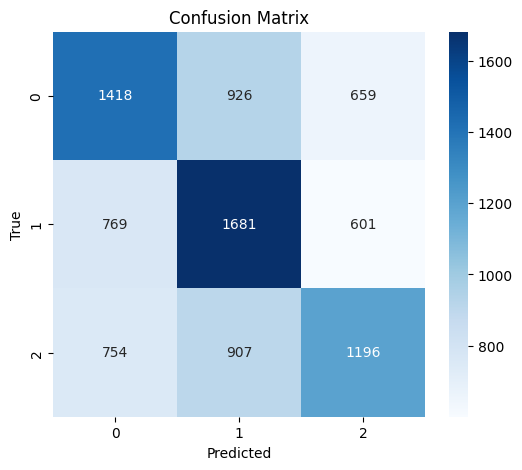

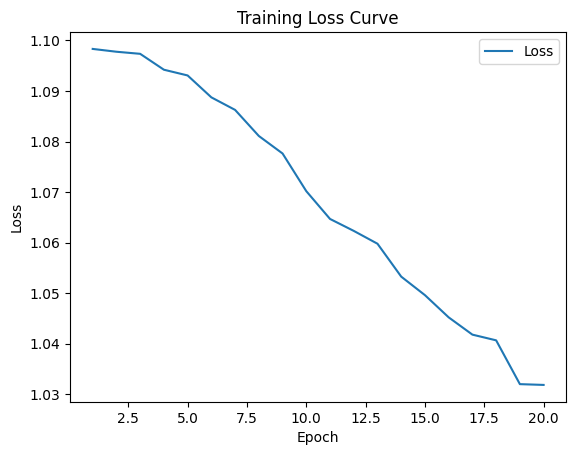

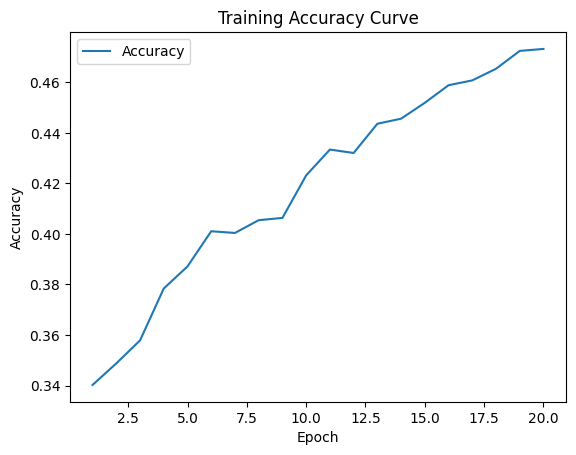

In [9]:
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader
# from Bio import SeqIO
# from torch.nn.utils.rnn import pad_sequence
# from tqdm import tqdm
# import random
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import os
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from PIL import Image

# # -----------------------
# # Step 0: Amino acid mapping
# # -----------------------
# amino_acids = "ACDEFGHIKLMNPQRSTVWY"
# aa_to_idx = {aa: i+1 for i, aa in enumerate(amino_acids)}

# sequences, headers = [], []
# for record in SeqIO.parse(input_file, "fasta"):
#     headers.append(record.id)
#     sequences.append(str(record.seq))

# # -----------------------
# # Step 1: Tokenize and pad
# # -----------------------
# def tokenize(seq):
#     return [aa_to_idx.get(aa, 0) for aa in seq]

# tokenized_sequences = [torch.tensor(tokenize(seq), dtype=torch.long) for seq in sequences]
# padded_sequences = pad_sequence(tokenized_sequences, batch_first=True, padding_value=0)
# seq_len = padded_sequences.shape[1]

# # -----------------------
# # Step 2: One-hot encoding
# # -----------------------
# num_tokens = max(aa_to_idx.values())
# def one_hot(seq_tensor):
#     onehot = torch.zeros(seq_tensor.size(0), num_tokens, dtype=torch.float)
#     for i, token in enumerate(seq_tensor):
#         if token > 0:
#             onehot[i, token-1] = 1.0
#     return onehot

# onehot_sequences = [one_hot(seq) for seq in padded_sequences]

# # -----------------------
# # Step 3: Dummy secondary structure labels
# # -----------------------
# dummy_labels = [torch.tensor([random.randint(0,2) for _ in range(seq_len)], dtype=torch.long) 
#                 for _ in range(len(onehot_sequences))]

# # -----------------------
# # Step 4: Dataset
# # -----------------------
# class ProteinDataset(Dataset):
#     def __init__(self, onehot_seqs, labels, headers):
#         self.onehot_seqs = onehot_seqs
#         self.labels = labels
#         self.headers = headers
#     def __len__(self):
#         return len(self.onehot_seqs)
#     def __getitem__(self, idx):
#         return {
#             "header": self.headers[idx],
#             "onehot": self.onehot_seqs[idx],
#             "label": self.labels[idx]
#         }

# dataset = ProteinDataset(onehot_sequences, dummy_labels, headers)
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# # -----------------------
# # Step 5: CNN Model
# # -----------------------
# class CNN2DStructurePredictor(nn.Module):
#     def __init__(self, input_dim=20, hidden_dim=128, output_dim=3):
#         super().__init__()
#         self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=5, padding=2)
#         self.conv3 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=7, padding=3)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.3)
#         self.fc = nn.Linear(hidden_dim, output_dim)
#         self.log_softmax = nn.LogSoftmax(dim=-1)

#     def forward(self, x):
#         x = x.transpose(1,2)
#         x = self.relu(self.conv1(x))
#         x = self.relu(self.conv2(x))
#         x = self.relu(self.conv3(x))
#         x = x.transpose(1,2)
#         x = self.dropout(x)
#         x = self.fc(x)
#         return self.log_softmax(x)

# model = CNN2DStructurePredictor()
# criterion = nn.NLLLoss(ignore_index=-1)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# # -----------------------
# # Step 6: Training
# # -----------------------
# num_epochs = 20
# train_losses, train_accs = [], []

# # Directory for weight images
# # -----------------------
# weight_dir = "/kaggle/working/weights_gif"
# os.makedirs(weight_dir, exist_ok=True)

# # -----------------------
# # Function to save model weights as images
# # -----------------------
# def save_weights_as_images(model, epoch):
#     for i, param in enumerate(model.parameters()):
#         weight = param.detach().cpu().numpy()
#         # Normalize to 0-255 for color visualization
#         norm_weight = 255 * (weight - weight.min()) / (weight.max() - weight.min() + 1e-8)
#         norm_weight = norm_weight.astype(np.uint8)
        
#         # Convert to PIL image, enlarge for visibility
#         img = Image.fromarray(norm_weight[0] if len(norm_weight.shape)>1 else norm_weight)
#         img = img.resize((200,200))  # enlarge
#         img.save(f"{weight_dir}/epoch{epoch+1}_layer{i+1}.png")
        
# for epoch in range(num_epochs):
#     model.train()
#     total_loss, correct, total = 0, 0, 0
#     loop = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
#     for batch_idx, batch in enumerate(loop):
#         X = batch['onehot']
#         Y = batch['label']

#         optimizer.zero_grad()
#         output = model(X)
#         output_t = output.transpose(1,2)
#         loss = criterion(output_t, Y)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         predicted = torch.argmax(output, dim=-1)
#         correct += (predicted == Y).sum().item()
#         total += Y.numel()

#         loop.set_postfix(loss=loss.item(), acc=correct/total)

#     avg_loss = total_loss/len(dataloader)
#     avg_acc = correct/total
#     train_losses.append(avg_loss)
#     train_accs.append(avg_acc)


#      # at the end of epoch:
#     save_weights_as_images(model, epoch)
    
#     # # -----------------------
#     # # Save weights images for GIF
#     # # -----------------------
#     # for i, param in enumerate(model.parameters()):
#     #     weight_img = param.detach().cpu().numpy()
#     #     # Normalize to 0-255
#     #     weight_img = 255 * (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min() + 1e-8)
#     #     weight_img = weight_img.astype(np.uint8)
#     #     im = Image.fromarray(weight_img[0] if len(weight_img.shape)>1 else weight_img)
#     #     im.save(f"/kaggle/working/weights_gif/epoch{epoch+1}_layer{i+1}.png")

#     scheduler.step()

# print("Training complete!")

# # -----------------------
# # Step 7: Evaluation
# # -----------------------
# model.eval()
# all_preds, all_labels = [], []
# with torch.no_grad():
#     test_loop = tqdm(dataloader, desc="Testing", leave=False)
#     for batch in test_loop:
#         X_test = batch['onehot']
#         Y_test = batch['label']
#         output = model(X_test)
#         predicted = torch.argmax(output, dim=-1)
#         all_preds.append(predicted.flatten())
#         all_labels.append(Y_test.flatten())

# all_preds = torch.cat(all_preds).cpu().numpy()
# all_labels = torch.cat(all_labels).cpu().numpy()

# # Accuracy, Precision, Recall, F1
# accuracy = accuracy_score(all_labels, all_preds)
# precision = precision_score(all_labels, all_preds, average='macro')
# recall = recall_score(all_labels, all_preds, average='macro')
# f1 = f1_score(all_labels, all_preds, average='macro')

# print(f"Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# # -----------------------
# # Step 8: Confusion Matrix
# # -----------------------
# cm = confusion_matrix(all_labels, all_preds)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix")
# plt.savefig("/kaggle/working/confusion_matrix.png")
# plt.show()

# # -----------------------
# # Step 9: Loss & Accuracy curves
# # -----------------------
# plt.figure()
# plt.plot(range(1,num_epochs+1), train_losses, label="Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("Training Loss Curve")
# plt.legend()
# plt.savefig("/kaggle/working/loss_curve.png")
# plt.show()

# plt.figure()
# plt.plot(range(1,num_epochs+1), train_accs, label="Accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.title("Training Accuracy Curve")
# plt.legend()
# plt.savefig("/kaggle/working/accuracy_curve.png")
# plt.show()


In [10]:
# import imageio.v2 as imageio
# import glob
# import os

# # Path to saved PNGs
# weights_dir = "/kaggle/working/weights_gif"
# png_files = sorted(glob.glob(os.path.join(weights_dir, "*.png")))

# # Output GIF path
# gif_path = "/kaggle/working/training_weights.gif"

# # Create GIF
# with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
#     for png_file in png_files:
#         image = imageio.imread(png_file)
#         writer.append_data(image)

# print(f"GIF saved at {gif_path}")


In [11]:
# # Example: take first conv layer weights
# param = list(model.parameters())[0].detach().cpu().numpy()  # shape [out_channels, in_channels, kernel]
# weight_img = np.mean(np.abs(param), axis=1)  # average across in_channels -> shape [out_channels, kernel_size]

# plt.figure(figsize=(6,6))
# plt.imshow(weight_img, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title("Layer 1 weights (magnitude)")
# # plt.savefig("/kaggle/working/weights_gif/layer1_epoch1.png")
# plt.show()

In [ ]:
# # -----------------------
# # Create GIFs
# # -----------------------
# weight_files = sorted(glob.glob(f"{weight_dir}/*.png"))

# # Color GIF
# color_imgs = [Image.open(f).convert("RGB") for f in weight_files]
# color_imgs[0].save("/kaggle/working/weights_color.gif",
#                    save_all=True, append_images=color_imgs[1:], duration=400, loop=0)

# # Raw-value GIF (numbers on cells)
# raw_imgs = []
# for f in tqdm(weight_files):
#     weight_matrix = np.array(Image.open(f))
#     fig, ax = plt.subplots(figsize=(6,6))
#     ax.imshow(weight_matrix, cmap='gray', aspect='auto')
#     for i in range(weight_matrix.shape[0]):
#         for j in range(weight_matrix.shape[1]):
#             ax.text(j, i, f"{weight_matrix[i,j]:.0f}", ha='center', va='center', fontsize=10, color='red')
#     plt.axis('off')
#     fig.canvas.draw()
#     img = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())
#     raw_imgs.append(img)
#     plt.close(fig)

# raw_imgs[0].save("/kaggle/working/weights_raw.gif",
#                  save_all=True, append_images=raw_imgs[1:], duration=400, loop=0)

# print("GIFs created in /kaggle/working/")

 16%|█▌        | 25/160 [12:57<1:11:44, 31.88s/it]

In [ ]:
# # Show color GIF
# display(Image(filename="/kaggle/working/weights_color.gif"))

# # Show raw-value GIF
# display(Image(filename="/kaggle/working/weights_raw.gif"))


In [ ]:
# import os, json, math, random
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset, DataLoader
# from torch.nn.utils.rnn import pad_sequence
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from PIL import Image
# import matplotlib.pyplot as plt

# # -----------------------
# # Paths & config (edit these)
# # -----------------------
# train_csv = "train.csv"
# val_csv   = "val.csv"
# test1_csv = "test1.csv"
# test2_csv = "test2.csv"

# out_dir = "./out_ss"          # where to save everything
# os.makedirs(out_dir, exist_ok=True)

# label_type = "sst3"           # choose "sst3" or "sst8"
# batch_size = 16
# num_epochs = 20
# lr = 1e-3
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # GIF options (simple & faster)
# make_gif = True
# gif_every = 5                 # save a frame every N epochs
# gif_path = os.path.join(out_dir, f"weights_{label_type}.gif")

# # -----------------------
# # Amino acid & label vocab
# # -----------------------
# amino_acids = "ACDEFGHIKLMNPQRSTVWY"
# aa_to_idx = {aa: i+1 for i, aa in enumerate(amino_acids)}  # 0 reserved for padding

# # 3-state: C/E/H
# labels_3 = list("CEH")
# lab3_to_idx = {c:i for i,c in enumerate(labels_3)}

# # 8-state (DSSP): H (alpha helix), E (beta strand), B (beta bridge), G (3-10 helix),
# # I (pi helix), T (turn), S (bend), C (coil/loop). Sometimes datasets use L or '-' for coil.
# labels_8 = ['H','E','B','G','I','T','S','C']
# lab8_to_idx = {c:i for i,c in enumerate(labels_8)}
# coil_aliases = set(['C','L','-','X'])  # normalize to 'C'

# def normalize_sst8_char(ch):
#     if ch in coil_aliases:
#         return 'C'
#     return ch if ch in lab8_to_idx else 'C'

# # -----------------------
# # Dataset
# # -----------------------
# class ProteinCSVDataset(Dataset):
#     def __init__(self, csv_path, label_type="sst3"):
#         df = pd.read_csv(csv_path)
#         assert 'seq' in df.columns and label_type in df.columns, \
#             f"CSV must have columns 'seq' and '{label_type}'"
#         self.seq = df['seq'].astype(str).tolist()
#         self.lab_raw = df[label_type].astype(str).tolist()
#         self.label_type = label_type
#         # sanity: ensure label length matches sequence; if not, trim/pad (trim preferred)
#         cleaned = []
#         for s, l in zip(self.seq, self.lab_raw):
#             if self.label_type == "sst8":
#                 l = ''.join(normalize_sst8_char(c) for c in l)
#             if len(l) != len(s):
#                 m = min(len(s), len(l))
#                 s = s[:m]
#                 l = l[:m]
#             cleaned.append((s, l))
#         self.seq, self.lab_raw = zip(*cleaned)

#     def __len__(self):
#         return len(self.seq)

#     def __getitem__(self, idx):
#         s = self.seq[idx]
#         l = self.lab_raw[idx]
#         # map sequence to int tokens (0 for PAD, 1..20 for amino acids; unknown->0)
#         toks = torch.tensor([aa_to_idx.get(a, 0) for a in s], dtype=torch.long)
#         # map labels to int classes; -100 = ignore (padding will set this)
#         if self.label_type == "sst3":
#             y = torch.tensor([lab3_to_idx.get(c, lab3_to_idx['C']) for c in l], dtype=torch.long)
#         else:
#             y = torch.tensor([lab8_to_idx.get(normalize_sst8_char(c), lab8_to_idx['C']) for c in l],
#                              dtype=torch.long)
#         return toks, y

# def collate_batch(batch):
#     # batch: list of (toks, y)
#     tok_seqs, y_seqs = zip(*batch)
#     # Pad tokens with 0; pad labels with ignore_index (-100)
#     toks_pad = pad_sequence(tok_seqs, batch_first=True, padding_value=0)
#     y_pad    = pad_sequence(y_seqs,  batch_first=True, padding_value=-100)
#     # one-hot encode on the fly to channels=20
#     B, L = toks_pad.shape
#     X = torch.zeros(B, L, 20, dtype=torch.float32)
#     # fill one-hot (skip PAD=0)
#     nonpad = toks_pad > 0
#     if nonpad.any():
#         rows, cols = torch.where(nonpad)
#         X[rows, cols, toks_pad[rows, cols]-1] = 1.0
#     return X, y_pad

# # -----------------------
# # Model (1D CNN over sequence)
# # -----------------------
# class CNN2DStructurePredictor(nn.Module):
#     def __init__(self, input_dim=20, hidden_dim=128, output_dim=3, dropout=0.3):
#         super().__init__()
#         self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=5, padding=2)
#         self.conv3 = nn.Conv1d(hidden_dim, hidden_dim, kernel_size=7, padding=3)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(dropout)
#         self.fc = nn.Linear(hidden_dim, output_dim)
#         self.log_softmax = nn.LogSoftmax(dim=-1)

#     def forward(self, x):               # x: (B, L, 20)
#         x = x.transpose(1, 2)           # (B, 20, L)
#         x = self.relu(self.conv1(x))
#         x = self.relu(self.conv2(x))
#         x = self.relu(self.conv3(x))
#         x = x.transpose(1, 2)           # (B, L, H)
#         x = self.dropout(x)
#         x = self.fc(x)                  # (B, L, C)
#         return self.log_softmax(x)

# # -----------------------
# # Utilities
# # -----------------------
# def plot_confusion_matrix(cm, classes, title, path_png):
#     plt.figure(figsize=(6,5))
#     plt.imshow(cm, interpolation='nearest')
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45, ha='right')
#     plt.yticks(tick_marks, classes)
#     # annotate
#     thresh = cm.max() / 2. if cm.max() > 0 else 0.5
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             plt.text(j, i, format(cm[i, j], 'd'),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")
#     plt.ylabel('True')
#     plt.xlabel('Predicted')
#     plt.tight_layout()
#     plt.savefig(path_png, dpi=150)
#     plt.close()

# def conv1_weights_image(model):
#     # Take conv1 weights (out_ch, in_ch=20, k)
#     with torch.no_grad():
#         w = model.conv1.weight.detach().cpu().numpy()
#     # Flatten to a 2D mosaic for visualization
#     # Shape: (out_ch, 20, K) -> stack along width: (out_ch, 20*K)
#     out_ch, in_ch, k = w.shape
#     tiles = w.reshape(out_ch, in_ch*k)
#     # Normalize 0..255
#     mn, mx = tiles.min(), tiles.max()
#     tiles = (255 * (tiles - mn) / (mx - mn + 1e-8)).astype(np.uint8)
#     # Resize small image to be visible
#     img = Image.fromarray(tiles)
#     img = img.resize((tiles.shape[1]*2, tiles.shape[0]*2), Image.NEAREST)
#     return img

# # -----------------------
# # Load data
# # -----------------------
# train_ds = ProteinCSVDataset(train_csv, label_type=label_type)
# val_ds   = ProteinCSVDataset(val_csv,   label_type=label_type)
# test1_ds = ProteinCSVDataset(test1_csv, label_type=label_type)
# test2_ds = ProteinCSVDataset(test2_csv, label_type=label_type)

# train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
# val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, collate_fn=collate_batch)
# test1_loader = DataLoader(test1_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)
# test2_loader = DataLoader(test2_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

# num_classes = 3 if label_type == "sst3" else 8
# class_names = labels_3 if label_type == "sst3" else labels_8

# # -----------------------
# # Train
# # -----------------------
# model = CNN2DStructurePredictor(output_dim=num_classes).to(device)
# criterion = nn.NLLLoss(ignore_index=-100)
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# hist = {
#     "label_type": label_type,
#     "num_classes": num_classes,
#     "class_names": class_names,
#     "train_loss": [],
#     "train_acc": [],
#     "val_loss": [],
#     "val_acc": [],
#     "splits": {}  # test metrics & confusion matrices saved here
# }

# gif_frames = []
# for epoch in range(1, num_epochs+1):
#     # --- train ---
#     model.train()
#     running_loss = 0.0
#     correct, total = 0, 0
#     for X, Y in train_loader:
#         X, Y = X.to(device), Y.to(device)
#         optimizer.zero_grad()
#         out = model(X)                 # (B,L,C)
#         loss = criterion(out.transpose(1,2), Y)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#         # accuracy over non-pad tokens
#         with torch.no_grad():
#             pred = out.argmax(dim=-1)  # (B,L)
#             mask = (Y != -100)
#             correct += (pred[mask] == Y[mask]).sum().item()
#             total   += mask.sum().item()

#     train_loss = running_loss / max(1, len(train_loader))
#     train_acc = correct / max(1, total)
#     hist["train_loss"].append(train_loss)
#     hist["train_acc"].append(train_acc)

#     # --- val ---
#     model.eval()
#     vloss, vcorrect, vtotal = 0.0, 0, 0
#     with torch.no_grad():
#         for X, Y in val_loader:
#             X, Y = X.to(device), Y.to(device)
#             out = model(X)
#             loss = criterion(out.transpose(1,2), Y)
#             vloss += loss.item()
#             pred = out.argmax(dim=-1)
#             mask = (Y != -100)
#             vcorrect += (pred[mask] == Y[mask]).sum().item()
#             vtotal   += mask.sum().item()
#     val_loss = vloss / max(1, len(val_loader))
#     val_acc = vcorrect / max(1, vtotal)
#     hist["val_loss"].append(val_loss)
#     hist["val_acc"].append(val_acc)

#     print(f"Epoch {epoch:02d}/{num_epochs}  train_loss={train_loss:.4f} acc={train_acc:.4f}  "
#           f"val_loss={val_loss:.4f} acc={val_acc:.4f}")

#     # lightweight GIF frame from conv1
#     if make_gif and (epoch % gif_every == 0 or epoch == num_epochs):
#         img = conv1_weights_image(model)
#         gif_frames.append(img)

#     scheduler.step()

# # save model
# model_path = os.path.join(out_dir, f"model_{label_type}.pt")
# torch.save(model.state_dict(), model_path)

# # build gif (few frames only)
# if make_gif and len(gif_frames) > 0:
#     gif_frames[0].save(
#         gif_path, save_all=True, append_images=gif_frames[1:], duration=500, loop=0
#     )

# # -----------------------
# # Evaluate helper
# # -----------------------
# def evaluate_and_log(name, loader):
#     model.eval()
#     all_preds, all_trues = [], []
#     with torch.no_grad():
#         for X, Y in loader:
#             X = X.to(device)
#             out = model(X)
#             pred = out.argmax(dim=-1).cpu()        # (B,L)
#             Y = Y.cpu()
#             mask = (Y != -100)
#             for p, y, m in zip(pred, Y, mask):
#                 all_preds.append(p[m])
#                 all_trues.append(y[m])
#     if len(all_trues) == 0:
#         return
#     y_true = torch.cat(all_trues).numpy()
#     y_pred = torch.cat(all_preds).numpy()

#     acc = float(accuracy_score(y_true, y_pred))
#     pre = float(precision_score(y_true, y_pred, average='macro', zero_division=0))
#     rec = float(recall_score(y_true, y_pred, average='macro', zero_division=0))
#     f1  = float(f1_score(y_true, y_pred, average='macro', zero_division=0))
#     cm  = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))

#     # Save CM image
#     cm_png = os.path.join(out_dir, f"cm_{name}_{label_type}.png")
#     plot_confusion_matrix(cm, class_names, f"Confusion Matrix ({name}-{label_type})", cm_png)

#     # Log to history json-friendly
#     hist["splits"][name] = {
#         "accuracy": acc, "precision": pre, "recall": rec, "f1": f1,
#         "confusion_matrix": cm.tolist(),
#         "confusion_matrix_png": os.path.basename(cm_png)
#     }
#     print(f"[{name}] acc={acc:.4f} pre={pre:.4f} rec={rec:.4f} f1={f1:.4f}")

# # -----------------------
# # Evaluate on val and both test sets
# # -----------------------
# evaluate_and_log("val",   val_loader)
# evaluate_and_log("test1", test1_loader)
# evaluate_and_log("test2", test2_loader)

# # -----------------------
# # Save metrics/history to JSON (for later plotting)
# # -----------------------
# hist_path = os.path.join(out_dir, f"metrics_{label_type}.json")
# with open(hist_path, "w") as f:
#     json.dump(hist, f, indent=2)

# # -----------------------
# # Also save training curves as PNGs now (optional)
# # -----------------------
# plt.figure()
# plt.plot(range(1, num_epochs+1), hist["train_loss"], label="Train")
# plt.plot(range(1, num_epochs+1), hist["val_loss"], label="Val")
# plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title(f"Loss ({label_type})"); plt.legend()
# plt.tight_layout(); plt.savefig(os.path.join(out_dir, f"loss_{label_type}.png"), dpi=150); plt.close()

# plt.figure()
# plt.plot(range(1, num_epochs+1), hist["train_acc"], label="Train")
# plt.plot(range(1, num_epochs+1), hist["val_acc"], label="Val")
# plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title(f"Accuracy ({label_type})"); plt.legend()
# plt.tight_layout(); plt.savefig(os.path.join(out_dir, f"acc_{label_type}.png"), dpi=150); plt.close()

# print(f"\nSaved model to: {model_path}")
# print(f"Saved metrics to: {hist_path}")
# if make_gif:
#     print(f"Saved GIF to: {gif_path}")


In [8]:
import os, json
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from tqdm import tqdm

print("imports done")

imports done


In [13]:
# -----------------------
# Paths & config
# -----------------------
train_csv = "/kaggle/input/proteinfiles/training_secondary_structure_train.csv"
val_csv   = "/kaggle/input/proteinfiles/validation_secondary_structure_valid.csv"
test1_csv = "/kaggle/input/proteinfiles/test_secondary_structure_ts115.csv"
test2_csv = "/kaggle/input/proteinfiles/test_secondary_structure_cb513.csv"

out_dir = "./out_ss"
os.makedirs(out_dir, exist_ok=True)
weights_dir = os.path.join(out_dir, "weights")
os.makedirs(weights_dir, exist_ok=True)

history_path = os.path.join(out_dir, "history.json")

batch_size = 16
num_epochs = 20
lr = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -----------------------
# Amino acids & labels
# -----------------------
amino_acids = "ACDEFGHIKLMNPQRSTVWY"
aa_to_idx = {aa: i+1 for i, aa in enumerate(amino_acids)}  # 0 = PAD

labels_3 = list("CEH")
lab3_to_idx = {c:i for i,c in enumerate(labels_3)}

labels_8 = ['H','E','B','G','I','T','S','C']
lab8_to_idx = {c:i for i,c in enumerate(labels_8)}
coil_aliases = set(['C','L','-','X'])
def normalize_sst8_char(ch):
    return 'C' if ch in coil_aliases else (ch if ch in lab8_to_idx else 'C')

# -----------------------
# Dataset
# -----------------------
class ProteinDualDataset(Dataset):
    def __init__(self, csv_path):
        df = pd.read_csv(csv_path)
        assert 'seq' in df.columns and 'sst3' in df.columns and 'sst8' in df.columns
        self.seq = df['seq'].astype(str).tolist()
        self.lab3 = df['sst3'].astype(str).tolist()
        self.lab8 = df['sst8'].astype(str).tolist()

        cleaned = []
        for s, l3, l8 in zip(self.seq, self.lab3, self.lab8):
            l8 = ''.join(normalize_sst8_char(c) for c in l8)
            m = min(len(s), len(l3), len(l8))
            cleaned.append((s[:m], l3[:m], l8[:m]))
        self.data = cleaned

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        s, l3, l8 = self.data[idx]
        toks = torch.tensor([aa_to_idx.get(a, 0) for a in s], dtype=torch.long)
        y3   = torch.tensor([lab3_to_idx.get(c, lab3_to_idx['C']) for c in l3], dtype=torch.long)
        y8   = torch.tensor([lab8_to_idx.get(c, lab8_to_idx['C']) for c in l8], dtype=torch.long)
        return toks, y3, y8

def collate_batch(batch):
    toks, y3, y8 = zip(*batch)
    toks_pad = pad_sequence(toks, batch_first=True, padding_value=0)
    y3_pad   = pad_sequence(y3,   batch_first=True, padding_value=-100)
    y8_pad   = pad_sequence(y8,   batch_first=True, padding_value=-100)

    # one-hot encode inputs
    B, L = toks_pad.shape
    X = torch.zeros(B, L, 20, dtype=torch.float32)
    nonpad = toks_pad > 0
    rows, cols = torch.where(nonpad)
    X[rows, cols, toks_pad[rows, cols]-1] = 1.0
    return X, y3_pad, y8_pad

# -----------------------
# Model
# -----------------------
class CNN2DStructureDual(nn.Module):
    def __init__(self, input_dim=20, hidden_dim=128, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, 3, padding=1)
        self.conv2 = nn.Conv1d(hidden_dim, hidden_dim, 5, padding=2)
        self.conv3 = nn.Conv1d(hidden_dim, hidden_dim, 7, padding=3)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.head3 = nn.Linear(hidden_dim, 3)  # sst3
        self.head8 = nn.Linear(hidden_dim, 8)  # sst8
        self.log_softmax = nn.LogSoftmax(dim=-1)

    def forward(self, x):
        x = x.transpose(1,2)       # (B,20,L)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = x.transpose(1,2)       # (B,L,H)
        x = self.dropout(x)
        out3 = self.log_softmax(self.head3(x))   # (B,L,3)
        out8 = self.log_softmax(self.head8(x))   # (B,L,8)
        return out3, out8

# -----------------------
# Evaluate
# -----------------------
def evaluate(loader, model, criterion3, criterion8, split="val"):
    model.eval()
    loss, correct3, total3, correct8, total8 = 0,0,0,0,0
    all_true3, all_pred3, all_true8, all_pred8 = [],[],[],[]
    with torch.no_grad():
        for X, Y3, Y8 in loader:
            X, Y3, Y8 = X.to(device), Y3.to(device), Y8.to(device)
            out3, out8 = model(X)
            l3 = criterion3(out3.transpose(1,2), Y3)
            l8 = criterion8(out8.transpose(1,2), Y8)
            loss += l3.item() + l8.item()

            p3 = out3.argmax(dim=-1); p8 = out8.argmax(dim=-1)
            mask3 = (Y3 != -100); mask8 = (Y8 != -100)
            correct3 += (p3[mask3] == Y3[mask3]).sum().item()
            total3   += mask3.sum().item()
            correct8 += (p8[mask8] == Y8[mask8]).sum().item()
            total8   += mask8.sum().item()

            all_true3.extend(Y3[mask3].cpu().tolist())
            all_pred3.extend(p3[mask3].cpu().tolist())
            all_true8.extend(Y8[mask8].cpu().tolist())
            all_pred8.extend(p8[mask8].cpu().tolist())

    acc3 = correct3/max(1,total3)
    acc8 = correct8/max(1,total8)
    cm3 = confusion_matrix(all_true3, all_pred3, labels=list(range(3))).tolist()
    cm8 = confusion_matrix(all_true8, all_pred8, labels=list(range(8))).tolist()
    print(f"[{split}] Loss={loss/len(loader):.4f} Acc3={acc3:.4f} Acc8={acc8:.4f}")
    return acc3, acc8, cm3, cm8, loss/len(loader)


# -----------------------
# Save weights each epoch
# -----------------------
def save_layer_weights(model, epoch, weights_dir):
    os.makedirs(weights_dir, exist_ok=True)
    layer_weights = {}

    for name, param in model.named_parameters():
        if "weight" in name:
            arr = param.detach().cpu().numpy()
            np.save(os.path.join(weights_dir, f"{name}_epoch{epoch}.npy"), arr)

            # Handle multi-channel arrays
            if arr.ndim == 4:  # Conv2D: [out, in, H, W]
                # Merge in/out channels for visualization: shape [H*out, W*in]
                out, inn, h, w = arr.shape
                arr_2d = arr.transpose(0,2,1,3).reshape(out*h, inn*w)
            elif arr.ndim == 3:  # [H, W, channels] or [channels, H, W]
                # reshape to 2D: stack channels horizontally
                arr_2d = arr.transpose(1,2,0).reshape(arr.shape[1], arr.shape[2]*arr.shape[0])
            elif arr.ndim == 2:  # Linear layer
                arr_2d = arr
            else:
                # fallback: flatten everything
                arr_2d = arr.reshape(arr.shape[0], -1)

            # Save as image
            plt.figure(figsize=(6,6))
            plt.imshow(arr_2d, aspect="auto", cmap="viridis")
            plt.colorbar()
            plt.title(f"{name} - Epoch {epoch}")
            plt.tight_layout()
            img_path = os.path.join(weights_dir, f"{name}_epoch{epoch}.png")
            plt.savefig(img_path)
            plt.close()
            layer_weights[name] = img_path

    return layer_weights
# -----------------------
# GIF creation
# -----------------------
def create_weight_gifs(weights_dir, out_dir):
    os.makedirs(out_dir, exist_ok=True)
    layer_to_imgs = {}
    # collect all images for each layer
    for f in sorted(os.listdir(weights_dir)):
        if f.endswith(".png"):
            layer = f.split("_epoch")[0]
            layer_to_imgs.setdefault(layer, []).append(os.path.join(weights_dir,f))

    # create gif per layer
    for layer, imgs in layer_to_imgs.items():
        gif_path = os.path.join(out_dir, f"{layer}.gif")
        frames = [imageio.imread(img) for img in imgs]
        imageio.mimsave(gif_path, frames, duration=0.8)
        print(f"[GIF] Saved {gif_path}")

print("dataset done")

dataset done


In [14]:
# -----------------------
# Main
# -----------------------
train_ds = ProteinDualDataset(train_csv)
val_ds   = ProteinDualDataset(val_csv)
test1_ds = ProteinDualDataset(test1_csv)
test2_ds = ProteinDualDataset(test2_csv)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, collate_fn=collate_batch)
test1_loader = DataLoader(test1_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)
test2_loader = DataLoader(test2_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)


print("train set-",len(train_ds))
print("val set-",len(val_ds))
print("test1 set-",len(test1_ds))
print("test2 set-",len(test2_ds))

train set- 8678
val set- 2170
test1 set- 115
test2 set- 513


In [15]:
model = CNN2DStructureDual().to(device)
criterion3 = nn.NLLLoss(ignore_index=-100)
criterion8 = nn.NLLLoss(ignore_index=-100)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

history = {"train_loss": [], "val_loss": [],
           "train_acc3": [], "val_acc3": [],
           "train_acc8": [], "val_acc8": [],
           "confusion_matrices": []}



for epoch in range(1,num_epochs+1):
    model.train()
    total_loss, correct3, total3, correct8, total8 = 0,0,0,0,0
    for X,Y3,Y8 in tqdm(train_loader):
        X,Y3,Y8 = X.to(device), Y3.to(device), Y8.to(device)
        optimizer.zero_grad()
        out3,out8 = model(X)
        l3 = criterion3(out3.transpose(1,2), Y3)
        l8 = criterion8(out8.transpose(1,2), Y8)
        loss = l3 + l8
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        p3, p8 = out3.argmax(dim=-1), out8.argmax(dim=-1)
        mask3, mask8 = (Y3!=-100), (Y8!=-100)
        correct3 += (p3[mask3]==Y3[mask3]).sum().item()
        total3   += mask3.sum().item()
        correct8 += (p8[mask8]==Y8[mask8]).sum().item()
        total8   += mask8.sum().item()
    scheduler.step()

    train_loss = total_loss/len(train_loader)
    train_acc3 = correct3/max(1,total3)
    train_acc8 = correct8/max(1,total8)

    val_acc3, val_acc8, cm3, cm8, val_loss = evaluate(val_loader, model, criterion3, criterion8, split="val")

    # save history
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc3"].append(train_acc3)
    history["val_acc3"].append(val_acc3)
    history["train_acc8"].append(train_acc8)
    history["val_acc8"].append(val_acc8)
    history["confusion_matrices"].append({"epoch": epoch, "cm3": cm3, "cm8": cm8})

    with open(history_path, "w") as f:
        json.dump(history, f, indent=2)

        # save weights as .pth
    torch.save(model.state_dict(), os.path.join(weights_dir, f"epoch_{epoch}.pth"))

    # save layer weight values + images
    save_layer_weights(model, epoch, weights_dir)

    print(f"Epoch {epoch}/{num_epochs} TrainLoss={train_loss:.4f} ValLoss={val_loss:.4f}")



100%|██████████| 543/543 [01:23<00:00,  6.53it/s]


[val] Loss=2.0306 Acc3=0.6667 Acc8=0.5385
Epoch 1/20 TrainLoss=2.2253 ValLoss=2.0306


100%|██████████| 543/543 [01:23<00:00,  6.50it/s]


[val] Loss=1.9981 Acc3=0.6727 Acc8=0.5473
Epoch 2/20 TrainLoss=2.0426 ValLoss=1.9981


100%|██████████| 543/543 [01:24<00:00,  6.46it/s]


[val] Loss=1.9646 Acc3=0.6803 Acc8=0.5555
Epoch 3/20 TrainLoss=2.0039 ValLoss=1.9646


100%|██████████| 543/543 [01:24<00:00,  6.42it/s]


[val] Loss=1.9512 Acc3=0.6843 Acc8=0.5592
Epoch 4/20 TrainLoss=1.9841 ValLoss=1.9512


100%|██████████| 543/543 [01:25<00:00,  6.38it/s]


[val] Loss=1.9390 Acc3=0.6865 Acc8=0.5617
Epoch 5/20 TrainLoss=1.9695 ValLoss=1.9390


100%|██████████| 543/543 [01:24<00:00,  6.41it/s]


[val] Loss=1.9653 Acc3=0.6785 Acc8=0.5555
Epoch 6/20 TrainLoss=1.9619 ValLoss=1.9653


100%|██████████| 543/543 [01:24<00:00,  6.41it/s]


[val] Loss=1.9306 Acc3=0.6880 Acc8=0.5634
Epoch 7/20 TrainLoss=1.9522 ValLoss=1.9306


100%|██████████| 543/543 [01:24<00:00,  6.44it/s]


[val] Loss=1.9398 Acc3=0.6857 Acc8=0.5617
Epoch 8/20 TrainLoss=1.9455 ValLoss=1.9398


100%|██████████| 543/543 [01:24<00:00,  6.45it/s]


[val] Loss=1.9240 Acc3=0.6898 Acc8=0.5648
Epoch 9/20 TrainLoss=1.9359 ValLoss=1.9240


100%|██████████| 543/543 [01:24<00:00,  6.41it/s]


[val] Loss=1.9204 Acc3=0.6902 Acc8=0.5661
Epoch 10/20 TrainLoss=1.9287 ValLoss=1.9204


100%|██████████| 543/543 [01:25<00:00,  6.33it/s]


[val] Loss=1.9243 Acc3=0.6890 Acc8=0.5650
Epoch 11/20 TrainLoss=1.9122 ValLoss=1.9243


100%|██████████| 543/543 [01:26<00:00,  6.29it/s]


[val] Loss=1.9165 Acc3=0.6908 Acc8=0.5670
Epoch 12/20 TrainLoss=1.9085 ValLoss=1.9165


100%|██████████| 543/543 [01:25<00:00,  6.37it/s]


[val] Loss=1.9153 Acc3=0.6908 Acc8=0.5671
Epoch 13/20 TrainLoss=1.9062 ValLoss=1.9153


100%|██████████| 543/543 [01:26<00:00,  6.28it/s]


[val] Loss=1.9207 Acc3=0.6889 Acc8=0.5662
Epoch 14/20 TrainLoss=1.9000 ValLoss=1.9207


100%|██████████| 543/543 [01:24<00:00,  6.44it/s]


[val] Loss=1.9343 Acc3=0.6864 Acc8=0.5634
Epoch 15/20 TrainLoss=1.8965 ValLoss=1.9343


100%|██████████| 543/543 [01:25<00:00,  6.33it/s]


[val] Loss=1.9135 Acc3=0.6911 Acc8=0.5679
Epoch 16/20 TrainLoss=1.8947 ValLoss=1.9135


100%|██████████| 543/543 [01:25<00:00,  6.37it/s]


[val] Loss=1.9154 Acc3=0.6908 Acc8=0.5677
Epoch 17/20 TrainLoss=1.8898 ValLoss=1.9154


100%|██████████| 543/543 [01:25<00:00,  6.32it/s]


[val] Loss=1.9147 Acc3=0.6909 Acc8=0.5679
Epoch 18/20 TrainLoss=1.8874 ValLoss=1.9147


100%|██████████| 543/543 [01:25<00:00,  6.35it/s]


[val] Loss=1.9190 Acc3=0.6905 Acc8=0.5670
Epoch 19/20 TrainLoss=1.8840 ValLoss=1.9190


100%|██████████| 543/543 [01:26<00:00,  6.29it/s]


[val] Loss=1.9168 Acc3=0.6909 Acc8=0.5671
Epoch 20/20 TrainLoss=1.8827 ValLoss=1.9168


In [16]:
# -----------------------
# Plot curves
# -----------------------
plt.figure()
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss Curve"); plt.savefig(os.path.join(out_dir,"loss_curve.png")); plt.close()

plt.figure()
plt.plot(history["train_acc3"], label="Train Acc (sst3)")
plt.plot(history["val_acc3"], label="Val Acc (sst3)")
plt.plot(history["train_acc8"], label="Train Acc (sst8)")
plt.plot(history["val_acc8"], label="Val Acc (sst8)")
plt.legend(); plt.title("Accuracy Curve"); plt.savefig(os.path.join(out_dir,"accuracy_curve.png")); plt.close()

# last confusion matrices
last_cm = history["confusion_matrices"][-1]
fig, ax = plt.subplots(1,2,figsize=(10,4))
im1 = ax[0].imshow(np.array(last_cm["cm3"]), cmap="Blues")
ax[0].set_title("Confusion Matrix (sst3)")
plt.colorbar(im1, ax=ax[0])
im2 = ax[1].imshow(np.array(last_cm["cm8"]), cmap="Blues")
ax[1].set_title("Confusion Matrix (sst8)")
plt.colorbar(im2, ax=ax[1])
plt.savefig(os.path.join(out_dir,"confusion_matrices.png")); plt.close()


In [17]:
def test_model(loader, model, criterion3, criterion8, split="test", out_dir=None, save_preds=True):
    """
    Evaluate the model on test data and save results to a text file.
    """
    model.eval()
    loss, correct3, total3, correct8, total8 = 0,0,0,0,0
    all_true3, all_pred3, all_true8, all_pred8 = [],[],[],[]
    with torch.no_grad():
        for X, Y3, Y8 in loader:
            X, Y3, Y8 = X.to(device), Y3.to(device), Y8.to(device)
            out3, out8 = model(X)
            l3 = criterion3(out3.transpose(1,2), Y3)
            l8 = criterion8(out8.transpose(1,2), Y8)
            loss += l3.item() + l8.item()

            p3 = out3.argmax(dim=-1)
            p8 = out8.argmax(dim=-1)
            mask3 = (Y3 != -100)
            mask8 = (Y8 != -100)

            correct3 += (p3[mask3] == Y3[mask3]).sum().item()
            total3   += mask3.sum().item()
            correct8 += (p8[mask8] == Y8[mask8]).sum().item()
            total8   += mask8.sum().item()

            all_true3.extend(Y3[mask3].cpu().tolist())
            all_pred3.extend(p3[mask3].cpu().tolist())
            all_true8.extend(Y8[mask8].cpu().tolist())
            all_pred8.extend(p8[mask8].cpu().tolist())

    avg_loss = loss / len(loader)
    acc3 = correct3 / max(1, total3)
    acc8 = correct8 / max(1, total8)
    cm3 = confusion_matrix(all_true3, all_pred3, labels=list(range(3)))
    cm8 = confusion_matrix(all_true8, all_pred8, labels=list(range(8)))

    print(f"[{split}] Loss={avg_loss:.4f} Acc3={acc3:.4f} Acc8={acc8:.4f}")

    # Save detailed results
    if out_dir is not None:
        os.makedirs(out_dir, exist_ok=True)
        txt_file = os.path.join(out_dir, f"{split}_results.txt")
        with open(txt_file, "w") as f:
            f.write(f"--- {split.upper()} RESULTS ---\n")
            f.write(f"Loss: {avg_loss:.4f}\n")
            f.write(f"Accuracy sst3: {acc3:.4f}\n")
            f.write(f"Accuracy sst8: {acc8:.4f}\n\n")
            f.write("Confusion Matrix sst3:\n")
            f.write(np.array2string(cm3))
            f.write("\n\nConfusion Matrix sst8:\n")
            f.write(np.array2string(cm8))
            f.write("\n\nIndividual Predictions (first 50 shown):\n")
            for t3,p3_,t8,p8_ in zip(all_true3[:50], all_pred3[:50], all_true8[:50], all_pred8[:50]):
                f.write(f"sst3: true={t3} pred={p3_} | sst8: true={t8} pred={p8_}\n")
        print(f"[{split}] Detailed results saved to {txt_file}")

    return {
        "loss": avg_loss,
        "acc3": acc3,
        "acc8": acc8,
        "cm3": cm3,
        "cm8": cm8
    }

print("test function")

test function


In [18]:
# -----------------------
# Final testing
# -----------------------
print("\n--- Final Testing ---")
test1_metrics = test_model(test1_loader, model, criterion3, criterion8, split="test1", out_dir=out_dir)
test2_metrics = test_model(test2_loader, model, criterion3, criterion8, split="test2", out_dir=out_dir)


--- Final Testing ---
[test1] Loss=1.8634 Acc3=0.7053 Acc8=0.5826
[test1] Detailed results saved to ./out_ss/test1_results.txt
[test2] Loss=2.0132 Acc3=0.6824 Acc8=0.5386
[test2] Detailed results saved to ./out_ss/test2_results.txt


In [19]:
create_weight_gifs(weights_dir, os.path.join(out_dir, "weight_gifs"))


[GIF] Saved ./out_ss/weight_gifs/conv1.weight.gif
[GIF] Saved ./out_ss/weight_gifs/conv2.weight.gif
[GIF] Saved ./out_ss/weight_gifs/conv3.weight.gif
[GIF] Saved ./out_ss/weight_gifs/head3.weight.gif
[GIF] Saved ./out_ss/weight_gifs/head8.weight.gif
